In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

In [5]:
df = pd.read_csv("BankNote_Authentication.csv")
print(df.head())
print(df['class'].unique())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
[0 1]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
df.shape

(1372, 5)

In [8]:
X = df.drop('class',axis=1)
y = df['class']
print(X.head())
print('\n')
print(y.head())

   variance  skewness  curtosis  entropy
0   3.62160    8.6661   -2.8073 -0.44699
1   4.54590    8.1674   -2.4586 -1.46210
2   3.86600   -2.6383    1.9242  0.10645
3   3.45660    9.5228   -4.0112 -3.59440
4   0.32924   -4.4552    4.5718 -0.98880


0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(960, 4)
(412, 4)


In [16]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(3,2), max_iter=500, activation='relu')

In [22]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=500)

In [23]:
pred = mlp.predict(X_test)
print(pred)

[1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1
 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1
 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1
 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0
 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 0 1]


In [24]:
confusion_matrix(y_test, pred)

array([[223,   0],
       [  0, 189]], dtype=int64)

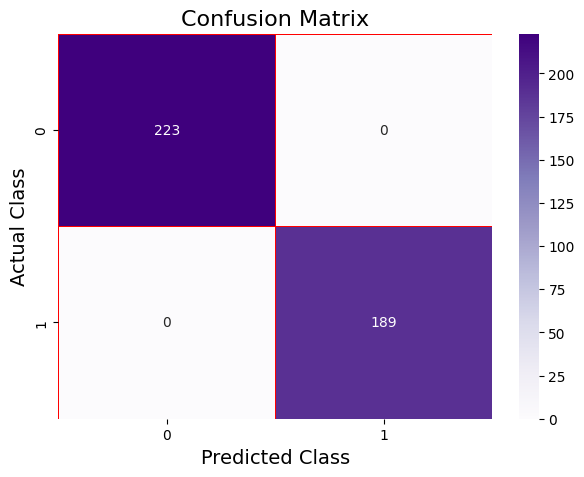

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, linewidth=0.6, linecolor="r", fmt=".0f", cmap="Purples")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Class", fontsize=14)
plt.ylabel("Actual Class", fontsize=14)
plt.show()


In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           1       1.00      1.00      1.00       189

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [26]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Test Accuracy: {accuracy}')


Test Accuracy: 1.0
